In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [18]:
himm_func_call_cnt = 0
himm_grad_call_cnt = 0

def himmelblau_func(x):
  global himm_func_call_cnt
  himm_func_call_cnt += 1
  return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def himmelblau_grad(x):
  global himm_grad_call_cnt
  himm_grad_call_cnt += 1
  dx = 2*(2*x[0]*(x[0]**2 + x[1] - 11) + x[0] + x[1]**2 - 7) 
  dy = 2*(x[0]**2 + 2*x[1]*(x[0] + x[1]**2 -7) + x[1] - 11)
  return np.array([dx, dy])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


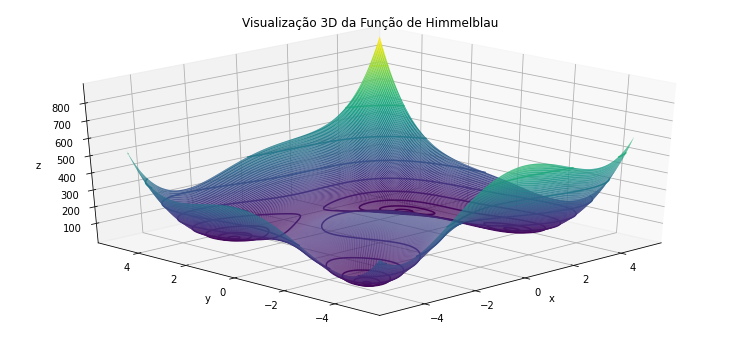

In [14]:
fig = plt.figure(figsize=(13,6))
ax = plt.axes(projection="3d") 
x_vals = np.linspace(-5, 5, 250)
y_vals = np.linspace(-5, 5, 250)
X, Y = np.meshgrid(x_vals, y_vals)
Z = himmelblau_func(X,Y)


plt.contour(X,Y,Z,np.arange(10)**3)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
#plt.plot(*min_global,rosenbrock_func(*min_global), 'r*', markersize=10)

plt.title('Visualização 3D da Função de Himmelblau')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(30, 225)

plt.show()

# Conjugado gradiente

In [26]:
import scipy.optimize as opt

opt_res = opt.minimize(himmelblau_func, [4, 4], method="CG", jac=himmelblau_grad) 

print("Ponto minimo: ", opt_res.x)
print("Valor da função : ", opt_res.fun)
print("Chamadas func : ", opt_res.nfev)
print("Chamadas grad : ", opt_res.njev)


Ponto minimo:  [3. 2.]
Valor da função :  8.490750396096654e-21
Chamadas func :  17
Chamadas grad :  17


#Nelder-Mead

In [37]:
ini_simplex = np.array([[-4.0,-4.0],[-4.0,1.0],[4.0,-1.0]])

opt_res = opt.minimize(himmelblau_func, [0,0] ,method="Nelder-Mead", options={'initial_simplex': ini_simplex}) 

print("Ponto minimo: ", opt_res.x)
print("Valor da função : ", opt_res.fun)
print("Chamadas func : ", opt_res.nfev)



Ponto minimo:  [ 3.58441449 -1.84811588]
Valor da função :  1.0686566996168641e-08
Chamadas func :  77


# BFGS

## Passando gradiente

In [43]:
himm_grad_call_cnt = 0

opt_res = opt.minimize(himmelblau_func, [4,4] ,method="L-BFGS-B",jac=himmelblau_grad) 

print("Ponto minimo: ", opt_res.x)
print("Valor da função : ", opt_res.fun)
print("Chamadas func : ", opt_res.nfev)

print(himm_grad_call_cnt)

Ponto minimo:  [2.99999986 2.00000019]
Valor da função :  8.287611020495648e-13
Chamadas func :  10
10


## Sem gradiente

In [44]:
himm_grad_call_cnt = 0

opt_res = opt.minimize(himmelblau_func, [4,4] ,method="L-BFGS-B") 

print("Ponto minimo: ", opt_res.x)
print("Valor da função : ", opt_res.fun)
print("Chamadas func : ", opt_res.nfev)

print(himm_grad_call_cnt)

Ponto minimo:  [2.99999985 2.00000019]
Valor da função :  8.502778926721376e-13
Chamadas func :  30
0


#NEWOA ou BOBYQA

In [49]:
!pip install Py-BOBYQA



In [51]:
import pybobyqa

soln = pybobyqa.solve(himmelblau_func, [4,4])

print(soln)

****** Py-BOBYQA Results ******
Solution xmin = [3. 2.]
Objective value f(xmin) = 1.287703555e-21
Needed 58 objective evaluations (at 58 points)
Approximate gradient = [6.40529709e-09 5.63832533e-08]
Approximate Hessian = [[73.79866447 20.17722283]
 [20.17722283 34.16328252]]
Exit flag = 0
Success: rho has reached rhoend
******************************

